<a href="https://colab.research.google.com/github/moniic/Play-Store-Data-Analysis/blob/main/Healthwell_Case_Study_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name**

To analyse the Healthwell insurance claims data & build a ML model to check accuracy of claimed amount.

**Project Summary**

 Healthwell is a digital healthcare platform for inpatient hospitalization, outpatient services, and corporate wellness benefits. Healthwell is the award-winning technology platform from Medi Assist that transforms the health insurance industry at the very core. Healthwell, with its diverse offerings for various stakeholders of the health benefits industry, makes the process of discovering, accessing, utilizing, and monitoring health benefits seamless, real-time, and virtually paperless. The company was founded in 2000 and based in Bangalore, Karnataka, India. In the assignment below, there are two datasets, one having the age and BMI (Body Mass Index) that is received from a pre health checkup before the policy cover; and the other dataset includes some personal details such as the no. of children, whether the person smokes or not, the location where the person is from etc.

**Objective - Build a machine learning model to predict the amount spent to the utmost accuracy. Validate and hyper parametrically tune the model to get the best results.**

**Import Dataset**

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [143]:
data= pd.read_csv('/content/drive/MyDrive/Narayana Assignment/Healthwell merged dataset.csv')

In [144]:
#First data view of Merged data
data.head()

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19,female,27.900,16884.92400,0,yes,southwest
1,PLC156907,18,male,33.770,1725.55230,1,no,southeast
2,PLC156916,28,male,33.000,4449.46200,3,no,southeast
3,PLC156925,33,male,22.705,21984.47061,0,no,northwest
4,PLC156934,32,male,28.880,3866.85520,0,no,northwest


**Know your data**

In [145]:
#Check rows & columns count
data.shape

(1338, 8)

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   age             1338 non-null   int64  
 2   sex             1338 non-null   object 
 3   bmi             1338 non-null   float64
 4   charges in INR  1338 non-null   float64
 5   children        1338 non-null   int64  
 6   smoker          1338 non-null   object 
 7   region          1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [147]:
data.describe()

,age,bmi,charges in INR,children
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265,1.094918
std,14.049960,6.098187,12110.011237,1.205493
min,18.000000,15.960000,1121.873900,0.000000
25%,27.000000,26.296250,4740.287150,0.000000
50%,39.000000,30.400000,9382.033000,1.000000
75%,51.000000,34.693750,16639.912515,2.000000
max,64.000000,53.130000,63770.428010,5.000000


In [148]:
data.columns

Index(['Policy no.', 'age', 'sex', 'bmi', 'charges in INR', 'children',
       'smoker', 'region'],
      dtype='object')

In [149]:
#Check duplicate values
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [150]:
#Check the missing values
data.isna().value_counts()


Policy no.  age    sex    bmi    charges in INR  children  smoker  region
False       False  False  False  False           False     False   False     1338
dtype: int64

**Understanding of variables**- We will explore the relationship among all variables & visualize the patterns.

**Does the gender of the person matter for the company as a constraint for extending policies?**

In [151]:
#Visualization between gender & no. of policies
Policycount_gender =  data.groupby(['sex'])['Policy no.'].count().reset_index()
Policycount_gender

,sex,Policy no.
0,female,662
1,male,676


<Axes: title={'center': 'No. of Policies based on gender'}, xlabel='sex', ylabel='Policy no.'>

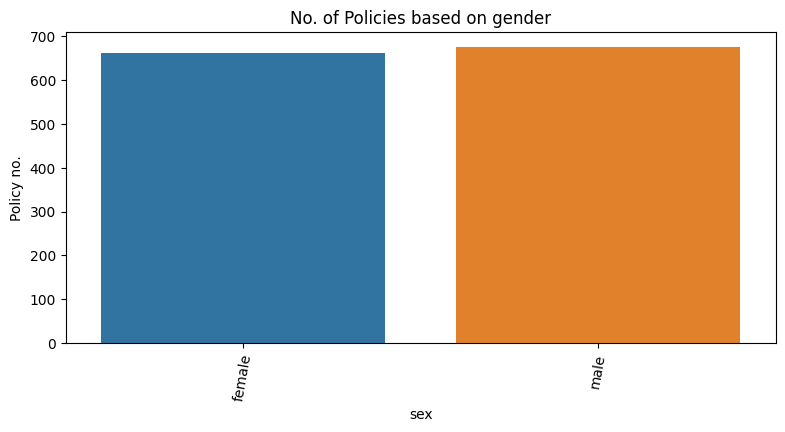

In [152]:
plt.figure(figsize =(8,4))
plt.xticks(rotation=80)
plt.xlabel('sex')
plt.ylabel('Policy no.')
plt.tight_layout()
plt.title('No. of Policies based on gender')
sns.barplot(x='sex',y='Policy no.',data = Policycount_gender)

In [153]:
#Visualization between BMI & age
Region_by_smokers =  data.groupby(['smoker'])['region'].count().reset_index()
Region_by_smokers

,smoker,region
0,no,1064
1,yes,274


<Axes: title={'center': 'Region_by_smokers'}, xlabel='region', ylabel='smoker'>

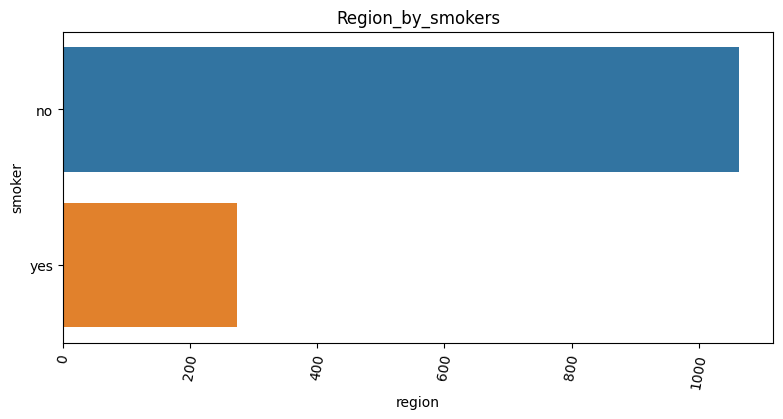

In [154]:
plt.figure(figsize =(8,4))
plt.xticks(rotation=80)
plt.xlabel('region')
plt.ylabel('smoker')
plt.tight_layout()
plt.title('Region_by_smokers')
sns.barplot(x='region',y='smoker',data = Region_by_smokers)

In [155]:
#To check the correlation among all variables, we have to use one hot encoding to convert string variable into numerical
enc = OneHotEncoder()

In [156]:
enc_data = pd.get_dummies(data, columns = ['sex','smoker', 'region'])
enc_data

,Policy no.,age,bmi,charges in INR,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,PLC156898,19,27.900,16884.92400,0,1,0,0,1,0,0,0,1
1,PLC156907,18,33.770,1725.55230,1,0,1,1,0,0,0,1,0
2,PLC156916,28,33.000,4449.46200,3,0,1,1,0,0,0,1,0
3,PLC156925,33,22.705,21984.47061,0,0,1,1,0,0,1,0,0
4,PLC156934,32,28.880,3866.85520,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,PLC168895,50,30.970,10600.54830,3,0,1,1,0,0,1,0,0
1334,PLC168904,18,31.920,2205.98080,0,1,0,1,0,1,0,0,0
1335,PLC168913,18,36.850,1629.83350,0,1,0,1,0,0,0,1,0
1336,PLC168922,21,25.800,2007.94500,0,1,0,1,0,0,0,0,1


In [157]:
#To understand the relationship among all the variables, we will use Correlation matrix
Correlation_matrix = enc_data.corr()



<ipython-input-157-e42198de261a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation_matrix = enc_data.corr()


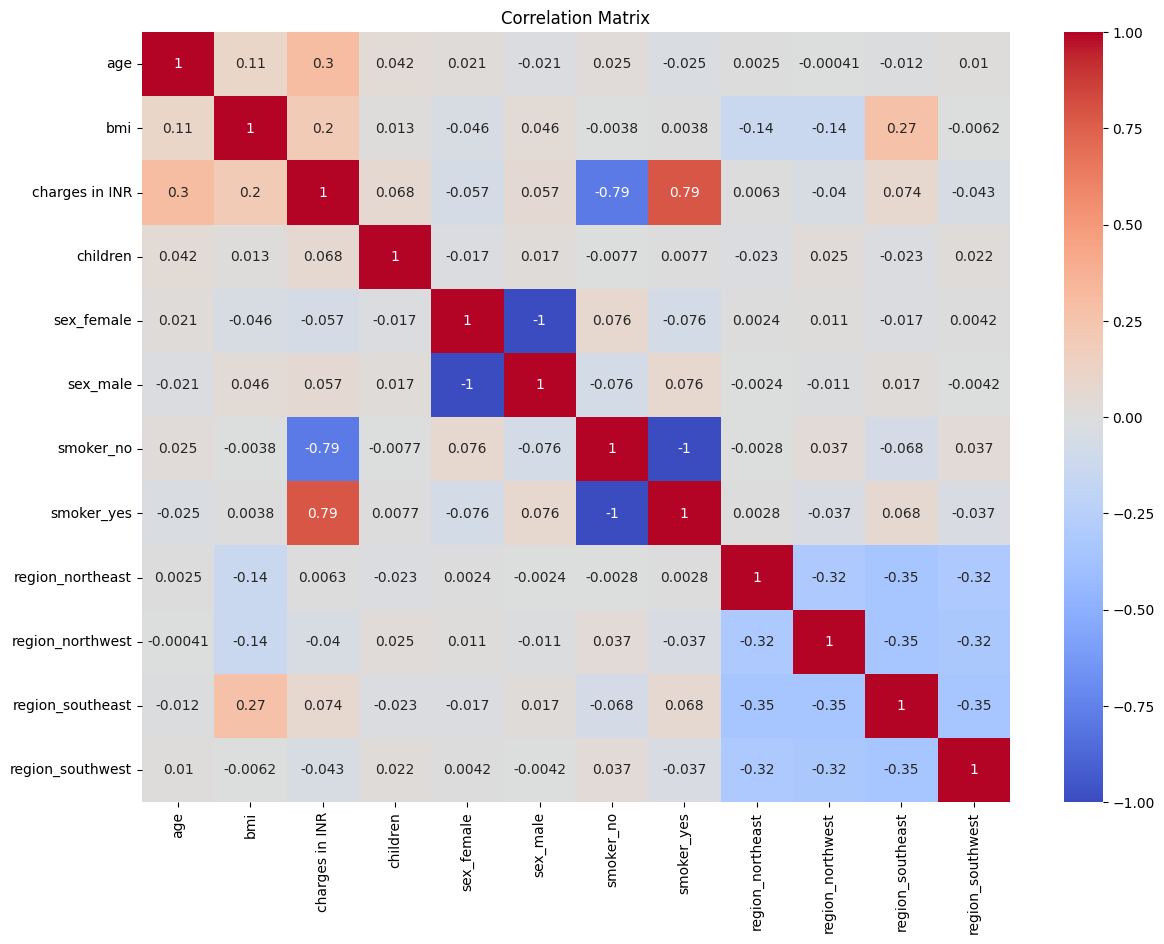

In [158]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(Correlation_matrix, annot=True, cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [159]:
#Data view after encoding the categorical variables into numeric
enc_data

,Policy no.,age,bmi,charges in INR,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,PLC156898,19,27.900,16884.92400,0,1,0,0,1,0,0,0,1
1,PLC156907,18,33.770,1725.55230,1,0,1,1,0,0,0,1,0
2,PLC156916,28,33.000,4449.46200,3,0,1,1,0,0,0,1,0
3,PLC156925,33,22.705,21984.47061,0,0,1,1,0,0,1,0,0
4,PLC156934,32,28.880,3866.85520,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,PLC168895,50,30.970,10600.54830,3,0,1,1,0,0,1,0,0
1334,PLC168904,18,31.920,2205.98080,0,1,0,1,0,1,0,0,0
1335,PLC168913,18,36.850,1629.83350,0,1,0,1,0,0,0,1,0
1336,PLC168922,21,25.800,2007.94500,0,1,0,1,0,0,0,0,1


In [160]:
#Statistical information about encode data
enc_data.describe()

,age,bmi,charges in INR,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265,1.094918,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,12110.011237,1.205493,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,4740.287150,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,9382.033000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,16639.912515,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,63770.428010,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In the above statistical information, the mean value of "bmi" & "charges in INR" certainly deviate with max value. So we assume that it might have some outliers present in data. Let us check the outliers.

In [161]:
enc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Policy no.        1338 non-null   object 
 1   age               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   charges in INR    1338 non-null   float64
 4   children          1338 non-null   int64  
 5   sex_female        1338 non-null   uint8  
 6   sex_male          1338 non-null   uint8  
 7   smoker_no         1338 non-null   uint8  
 8   smoker_yes        1338 non-null   uint8  
 9   region_northeast  1338 non-null   uint8  
 10  region_northwest  1338 non-null   uint8  
 11  region_southeast  1338 non-null   uint8  
 12  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), object(1), uint8(8)
memory usage: 62.8+ KB


<Axes: xlabel='age'>

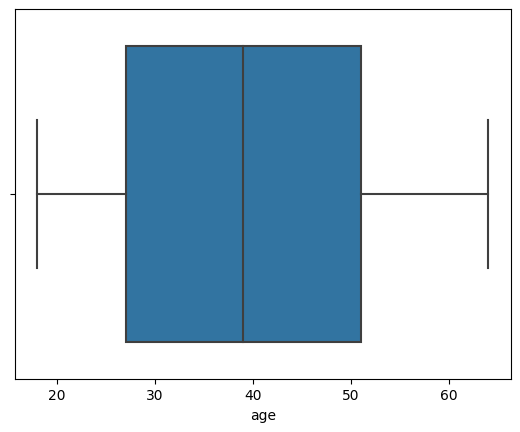

In [162]:
sns.boxplot(x=enc_data["age"])

<Axes: xlabel='bmi'>

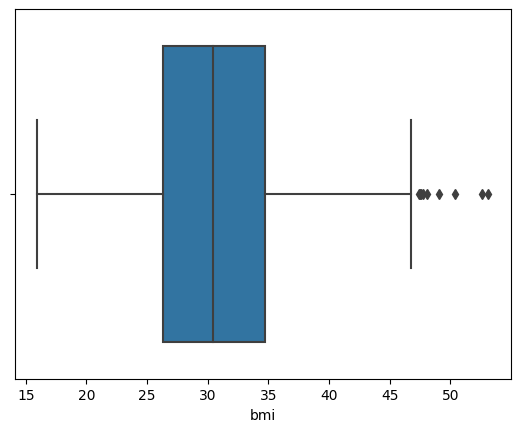

In [163]:
#Checking the outliers by creating box plot for "Charges in INR" & BMI variables
#Create a box plot for BMI
sns.boxplot(x=enc_data["bmi"])

<Axes: xlabel='charges in INR'>

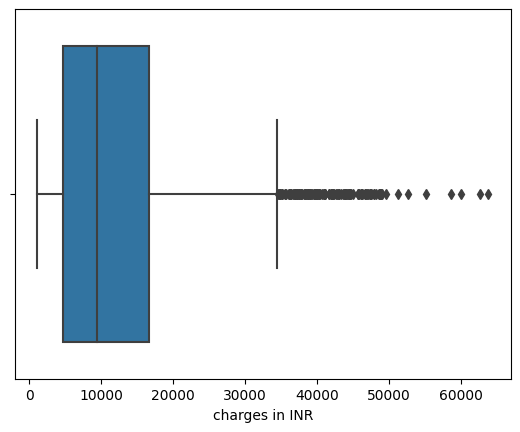

In [164]:
#Create a box plot for Charges in INR
sns.boxplot(x=enc_data["charges in INR"])

**Outliers Treatment to avoid biasness in data & Model Accuracy**

In [165]:
#Treat outliers for the column "BMI" with threshold= 1.5
q1 = enc_data['bmi'].quantile(0.25)
q1

26.29625

In [166]:
q3 = enc_data['bmi'].quantile(0.75)
q3

34.69375

In [167]:
iqr = q3 - q1
iqr

8.3975

In [168]:
threshold = 1.5
lower_bound = q1 - threshold * iqr
lower_bound

13.7

In [169]:
upper_bound = q3 + threshold * iqr
upper_bound

47.290000000000006

In [170]:
# Remove outliers from the DataFrame for 'BMI' column
df_clean = enc_data[(enc_data['bmi'] >= lower_bound) & (enc_data['bmi'] <= upper_bound)]

df_clean

,Policy no.,age,bmi,charges in INR,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,PLC156898,19,27.900,16884.92400,0,1,0,0,1,0,0,0,1
1,PLC156907,18,33.770,1725.55230,1,0,1,1,0,0,0,1,0
2,PLC156916,28,33.000,4449.46200,3,0,1,1,0,0,0,1,0
3,PLC156925,33,22.705,21984.47061,0,0,1,1,0,0,1,0,0
4,PLC156934,32,28.880,3866.85520,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,PLC168895,50,30.970,10600.54830,3,0,1,1,0,0,1,0,0
1334,PLC168904,18,31.920,2205.98080,0,1,0,1,0,1,0,0,0
1335,PLC168913,18,36.850,1629.83350,0,1,0,1,0,0,0,1,0
1336,PLC168922,21,25.800,2007.94500,0,1,0,1,0,0,0,0,1


In [171]:
#Treat outliers for the column "charges in INR" with threshold= 1.5
q1= df_clean['charges in INR'].quantile(0.25)
q1

4738.2682

In [172]:
q3= df_clean['charges in INR'].quantile(0.75)
q3

16586.49771

In [173]:
iqr = q3 - q1
iqr

11848.22951

In [174]:
threshold = 1.5
lower_bound = q1 - threshold * iqr
lower_bound

-13034.076065

In [175]:
threshold = 1.5
upper_bound = q1 + threshold * iqr
upper_bound

22510.612465

In [176]:
# Remove outliers from the DataFrame for 'BMI' column
cleaned_df = df_clean[(df_clean['charges in INR'] >= lower_bound) & (df_clean['charges in INR'] <= upper_bound)]

cleaned_df

,Policy no.,age,bmi,charges in INR,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,PLC156898,19,27.900,16884.92400,0,1,0,0,1,0,0,0,1
1,PLC156907,18,33.770,1725.55230,1,0,1,1,0,0,0,1,0
2,PLC156916,28,33.000,4449.46200,3,0,1,1,0,0,0,1,0
3,PLC156925,33,22.705,21984.47061,0,0,1,1,0,0,1,0,0
4,PLC156934,32,28.880,3866.85520,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,PLC168886,52,44.700,11411.68500,3,1,0,1,0,0,0,0,1
1333,PLC168895,50,30.970,10600.54830,3,0,1,1,0,0,1,0,0
1334,PLC168904,18,31.920,2205.98080,0,1,0,1,0,1,0,0,0
1335,PLC168913,18,36.850,1629.83350,0,1,0,1,0,0,0,1,0


In [177]:
cleaned_df.describe()

,age,bmi,charges in INR,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000
mean,38.442831,30.078439,8486.250185,1.080762,0.510889,0.489111,0.919238,0.080762,0.245009,0.250454,0.252269,0.252269
std,13.871340,5.957108,5302.546634,1.221891,0.500108,0.500108,0.272593,0.272593,0.430288,0.433471,0.434512,0.434512
min,18.000000,15.960000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,25.800000,4134.942512,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,29.805000,7639.863325,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.000000,33.915000,11842.025262,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.750000,1.000000,1.000000
max,64.000000,46.750000,22493.659640,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Here we can see that outliers are removed from the data. Now we will remove the irrelevant columns from the data. We will only consider those features which have positive coorelation with the dependent varibale "charge in INR".

In [178]:
cleaned_df.columns

Index(['Policy no.', 'age', 'bmi', 'charges in INR', 'children', 'sex_female',
       'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [179]:
#Remove the irrelevant columns 'Policy no.', 'children', 'sex_female', 'sex_male', 'region_northeast','region_northwest', 'region_southeast', 'region_southwest'
new_df= cleaned_df.drop(columns=['Policy no.', 'children', 'sex_female', 'sex_male', 'region_northeast','region_northwest', 'region_southeast', 'region_southwest'], axis = 1)
new_df


,age,bmi,charges in INR,smoker_no,smoker_yes
0,19,27.900,16884.92400,0,1
1,18,33.770,1725.55230,1,0
2,28,33.000,4449.46200,1,0
3,33,22.705,21984.47061,1,0
4,32,28.880,3866.85520,1,0
...,...,...,...,...,...
1332,52,44.700,11411.68500,1,0
1333,50,30.970,10600.54830,1,0
1334,18,31.920,2205.98080,1,0
1335,18,36.850,1629.83350,1,0


Feature Selection for Model Building

In [180]:
# Select the dependent variable
y = new_df['charges in INR']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges in INR, Length: 1102, dtype: float64

In [181]:
# Select the independependent variable

x= new_df.drop('charges in INR', axis=1)
x


,age,bmi,smoker_no,smoker_yes
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,1,0
3,33,22.705,1,0
4,32,28.880,1,0
...,...,...,...,...
1332,52,44.700,1,0
1333,50,30.970,1,0
1334,18,31.920,1,0
1335,18,36.850,1,0


In [182]:
#Import StandardScaler to normalize the numerical features
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()

In [183]:
x= Scaler.fit_transform(x)
y= Scaler.fit_transform(new_df['charges in INR'].values.reshape(-1,1))

In [184]:
x.shape

(1102, 4)

In [185]:
y.shape

(1102, 1)

**ML Model Building- Liner Regression**

In [186]:
# Initialize the linear regression model
lr = LinearRegression()

In [187]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test= train_test_split(x, y,  test_size= 0.20, random_state= 5)

In [188]:
# Train the model on the training data
lr.fit(x_train, y_train)

LinearRegression()

In [189]:
# Make predictions on the test data
y_pred = lr.predict(x_test)

In [190]:
# Calculate the mean absolute error of the predictions
mae = mean_absolute_error(y_test, y_pred)
mae

0.3040040850141375

In [191]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
mse

0.37165863191735704

In [192]:
# Calculate the root mean squared error of the predictions
rmse = np.sqrt(mse)
rmse

0.6096381155385193

In [193]:
y_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
print(y_pred,y_test_pred)
#print(y_test_pred)

[[ 6.56949277e-01]
 [-1.09047765e+00]
 [-1.00720416e+00]
 [-1.79293184e-01]
 [ 1.29823944e+00]
 [ 5.63875808e-01]
 [-8.30206239e-01]
 [-6.37036487e-01]
 [ 3.12488230e-01]
 [ 1.23511501e-01]
 [-1.08885406e+00]
 [ 6.58295250e-01]
 [ 4.09253077e-01]
 [ 4.88682017e-01]
 [ 1.09823883e-01]
 [ 1.28376109e+00]
 [-3.90449479e-03]
 [ 1.56644936e-01]
 [-5.40271641e-01]
 [-6.28749055e-01]
 [-8.59554944e-02]
 [ 5.60516609e-01]
 [-1.11299261e+00]
 [ 2.05270518e-01]
 [-7.10856544e-01]
 [-5.41090137e-01]
 [ 4.29159377e-01]
 [ 4.33601293e-01]
 [ 9.10390276e-01]
 [-1.04347566e+00]
 [-1.03314821e+00]
 [-1.13039937e+00]
 [-6.61342579e-01]
 [ 8.68192074e-01]
 [-8.52887773e-01]
 [-1.13832590e+00]
 [ 3.32685549e-01]
 [-1.07165407e+00]
 [ 4.89056321e-01]
 [ 9.72827923e-01]
 [-8.24403986e-01]
 [-4.27389521e-01]
 [ 1.69968146e+00]
 [-8.27776584e-01]
 [ 3.34497250e-02]
 [-4.68532768e-01]
 [-2.10635489e-01]
 [ 6.04394893e-01]
 [-1.14421143e+00]
 [-6.84329494e-01]
 [-2.62528847e-02]
 [ 3.00939249e-01]
 [-3.8941113

#Gradient Boosting

In [194]:
from sklearn.ensemble import GradientBoostingRegressor
# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [195]:
# Train the model on the training data
gb_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

In [196]:
# Make predictions on the testing data
y_pred = gb_model.predict(x_test)

In [197]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mse

0.3934344941293092

In [198]:
# Evaluate the model using Mean absolute Error
mae = mean_absolute_error(y_test, y_pred)
mae

0.3087973663303307

In [199]:
# Calculate the root mean squared error of the predictions
rmse = np.sqrt(mse)
rmse

0.6272435684240287

#XG Boosting

In [211]:
# Initialize the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [212]:
# Train the model on the training data
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [214]:
# Make predictions on the testing data
y_pred = xgb_model.predict(x_test)

In [216]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mse

0.3800289801948042

In [218]:
# Evaluate the model using r2 Error
rmse = np.sqrt(mse)
rmse

0.6164649058906794

In [219]:
# Evaluate the model using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
mae

0.3048236506282677

#RandomForest Model

In [201]:
# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

In [203]:
# Train the model on the training data
rf_model.fit(x_train, y_train)

<ipython-input-203-5d86d3612ab5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [204]:
# Make predictions on the testing data
y_pred = rf_model.predict(x_test)

In [206]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
mse

0.5290501213560953

In [207]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.3696565964561707

In [208]:
rmse = np.sqrt(mse)
rmse

0.7273583170323243

In [221]:
# Initialize and train multiple models
models = {'Linear Regression':LinearRegression(),'GradientBoostingRegressor':GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),'XG Boost':xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),'Random Forest Regressor':RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)}

In [226]:
scores = []
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    scores.append({'Model': model_name, 'MSE': mse,'MAE':mae,'RMSE':rmse})

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-226-7af93cc5adcf>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


In [228]:
# Create a DataFrame from the scores
scores_df = pd.DataFrame(scores)
scores_df

,Model,MSE,MAE,RMSE
0,Linear Regression,0.371659,0.371659,0.609638
1,GradientBoostingRegressor,0.393434,0.393434,0.627244
2,XG Boost,0.380029,0.380029,0.616465
3,Random Forest Regressor,0.529050,0.529050,0.727358


**Here we can see the scores of all models & conclude that Linear Regresssion performed well as the error predictions are very low which indicates the high accuracy of the model.**